## Clustering on Crime Data

Problem Statement : Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences. 

In [59]:
#(Perform clustering (hierarchical,K means clustering and DBSCAN))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

In [60]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

from scipy.spatial.distance import cdist 

In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [62]:
crime = pd.read_csv("F://RStudio//excelR//assignments//assignment 7//clustering//crime_data.csv")
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [63]:
crime.shape

(50, 5)

In [64]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [65]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [66]:
# rename cloumn name
crime = crime.rename({"Unnamed: 0":"US_State"},axis=1)
crime

,US_State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [67]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

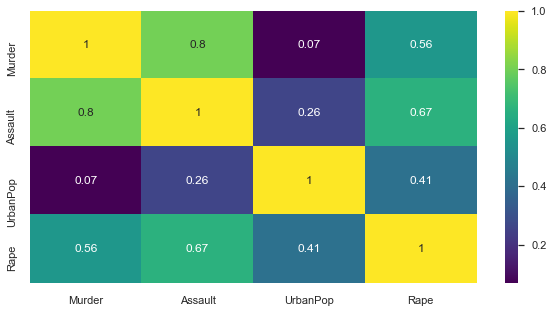

In [68]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(crime.corr(),annot=True,cmap='viridis')

### Inferences:
1. Assault and Murder have good correlation of 0.8
2. Assault and Rape have moderate correlation of 0.67
2. Rape and Murder have moderate correlation of 0.56

In [69]:
crime.isnull().sum()

US_State    0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:>

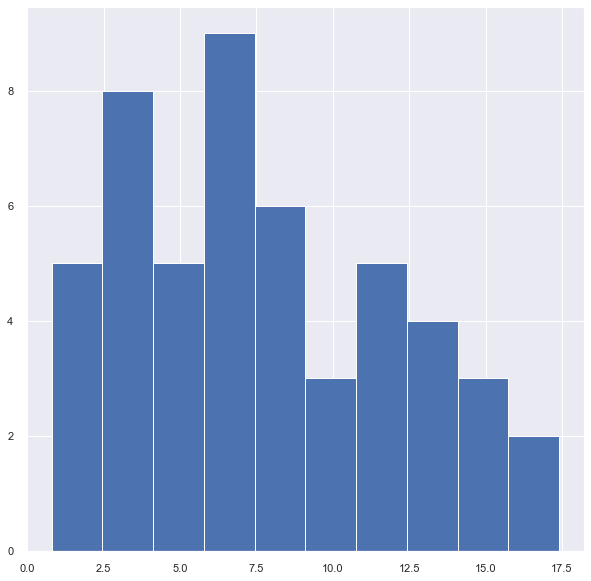

In [70]:
# histogram of Balance
crime['Murder'].hist(grid= True)

In [71]:
#Descriptive stat
crime['Murder'].describe()

count    50.00000
mean      7.78800
std       4.35551
min       0.80000
25%       4.07500
50%       7.25000
75%      11.25000
max      17.40000
Name: Murder, dtype: float64

<AxesSubplot:ylabel='Density'>

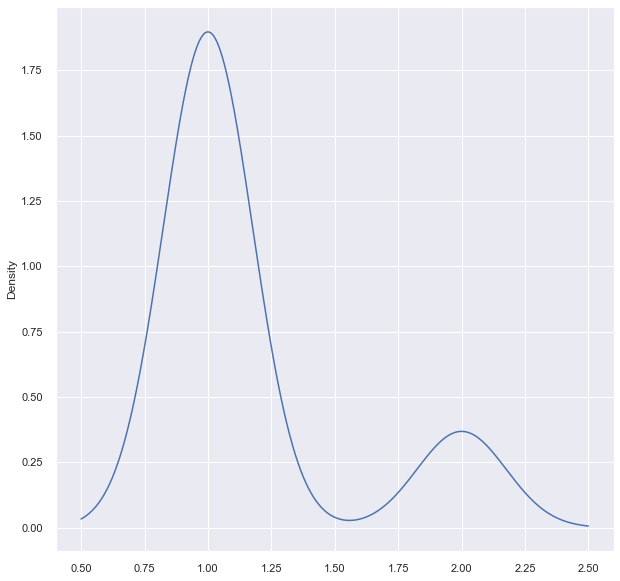

In [72]:
crime['Murder'].value_counts().plot(kind='density', grid=True)

<AxesSubplot:>

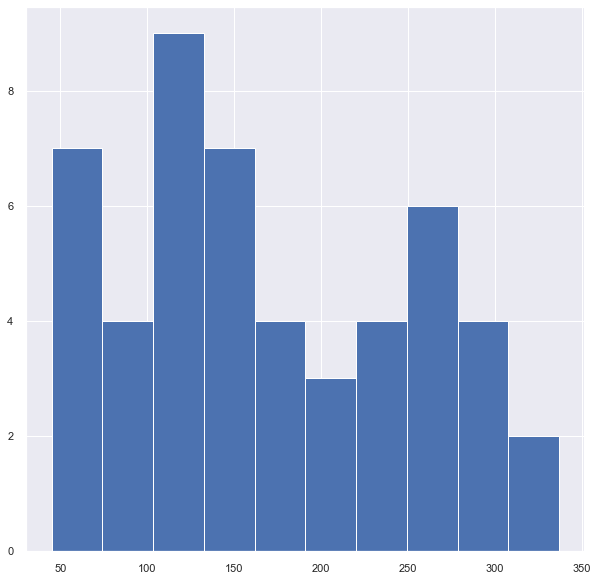

In [73]:
# histogram of Qual_miles
crime['Assault'].hist(grid= True)

<AxesSubplot:>

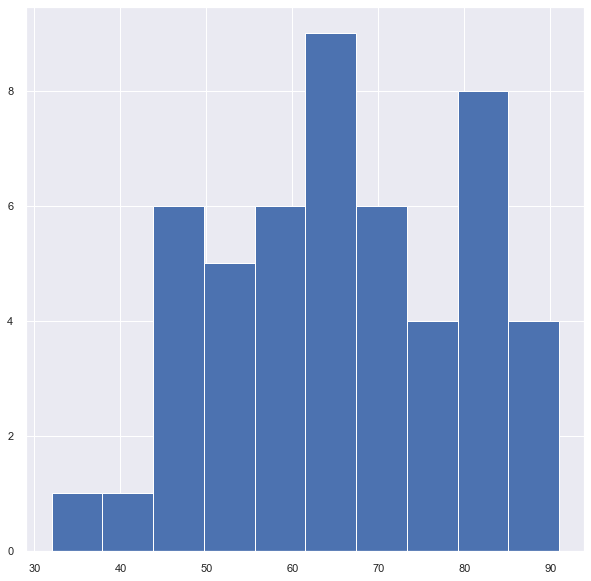

In [74]:
# histogram of cc1_miles
crime['UrbanPop'].hist()

In [75]:
crime['UrbanPop'].value_counts()

66    4
80    4
45    2
67    2
48    2
70    2
72    2
60    2
44    2
83    2
53    1
50    1
51    1
52    1
65    1
54    1
57    1
58    1
59    1
62    1
56    1
91    1
39    1
32    1
89    1
87    1
86    1
85    1
81    1
78    1
77    1
75    1
74    1
73    1
68    1
63    1
Name: UrbanPop, dtype: int64

<AxesSubplot:ylabel='Density'>

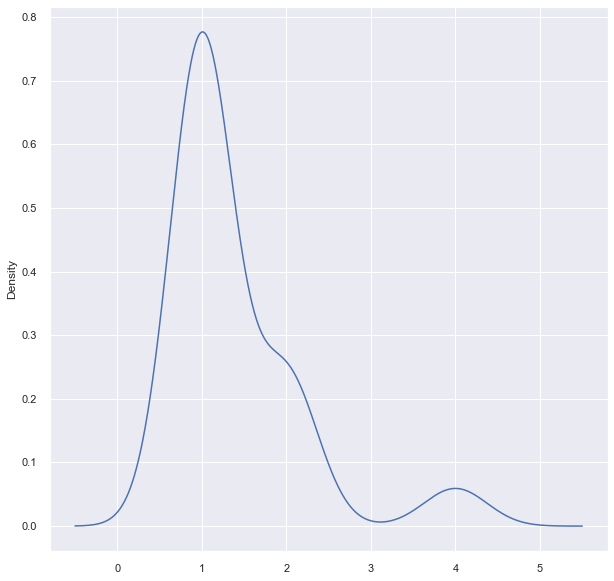

In [76]:
crime['UrbanPop'].value_counts().plot(kind='density',grid=True)

<AxesSubplot:>

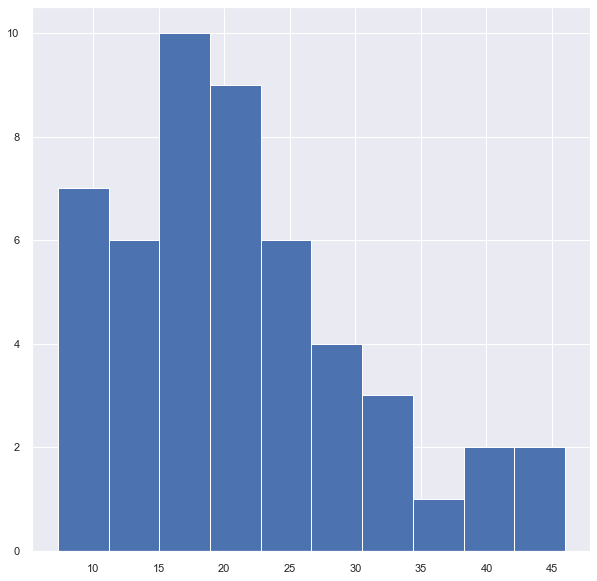

In [77]:
# histogram of cc3_miles
crime['Rape'].hist()

In [78]:
crime['Rape'].value_counts()

14.9    2
16.3    2
27.8    1
16.1    1
16.5    1
10.8    1
16.4    1
18.0    1
20.7    1
22.9    1
32.1    1
19.5    1
12.8    1
22.2    1
17.1    1
31.9    1
9.5     1
7.3     1
15.6    1
21.4    1
15.8    1
40.6    1
21.2    1
20.0    1
44.5    1
26.2    1
14.2    1
28.2    1
35.1    1
22.5    1
21.0    1
24.0    1
31.0    1
18.8    1
29.3    1
20.2    1
9.3     1
11.1    1
46.0    1
7.8     1
8.3     1
11.2    1
38.7    1
26.1    1
25.5    1
26.9    1
11.3    1
25.8    1
Name: Rape, dtype: int64

<AxesSubplot:ylabel='Density'>

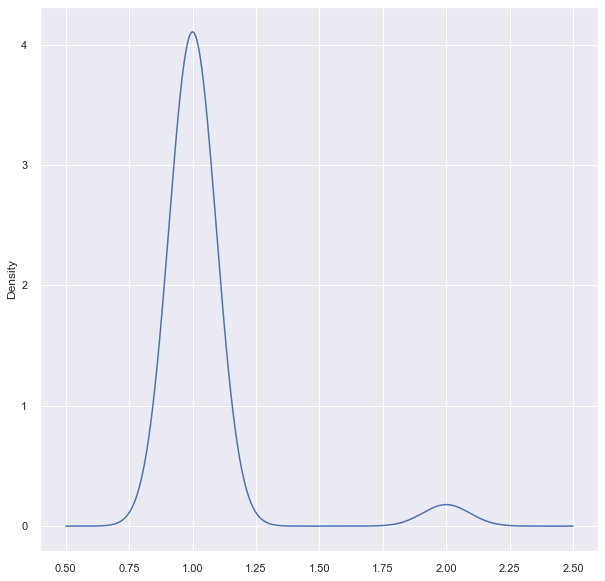

In [79]:
crime['Rape'].value_counts().plot(kind='density',grid=True)

<AxesSubplot:xlabel='Rape', ylabel='Density'>

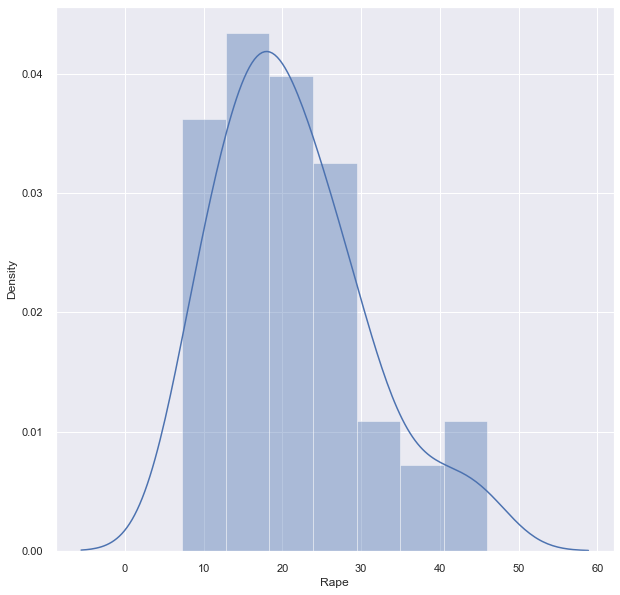

In [80]:
sns.distplot(crime['Rape'])

## Normalisation the dataset on Crime

In [82]:
# Normalization function to minimize redundancy (duplicate data) 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [83]:
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


<AxesSubplot:ylabel='Count'>

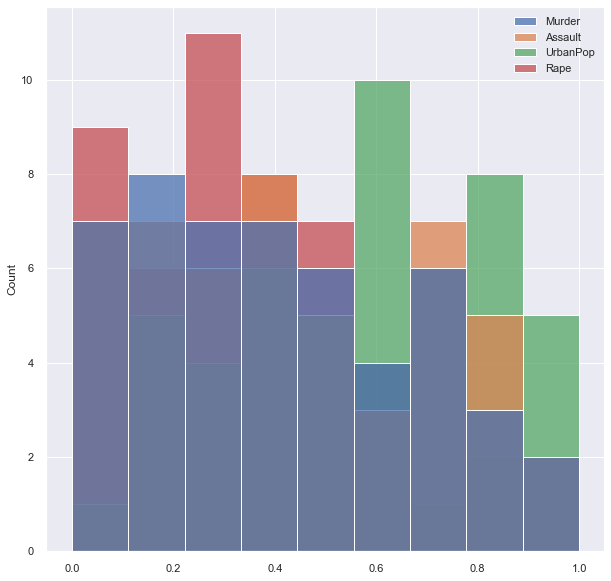

In [84]:
sns.histplot(crime_norm)
#sns.distplot(crime_norm)

<AxesSubplot:ylabel='Density'>

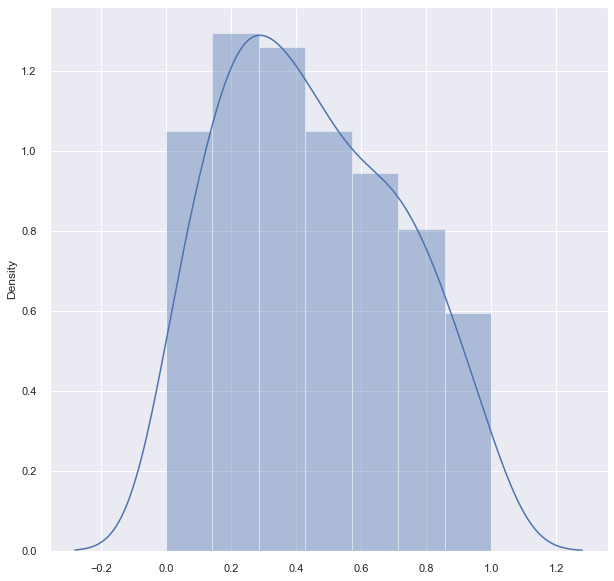

In [85]:
sns.distplot(crime_norm)

In [86]:
crime_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [87]:
crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


## Standardization the dataset on Crime

In [88]:
# Standardization to standardize the range of features of input data set as pre-processing step
def std_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [89]:
crime_std = std_func(crime.iloc[:,1:])
crime_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


<AxesSubplot:ylabel='Density'>

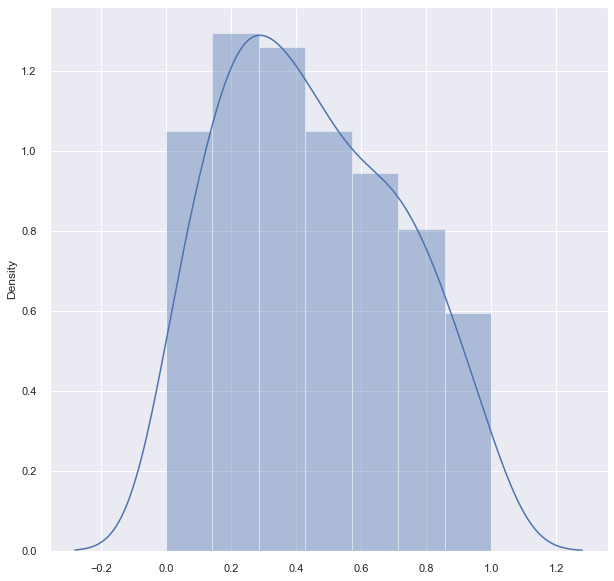

In [90]:
sns.distplot(crime_std)

# KMeans

In [91]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

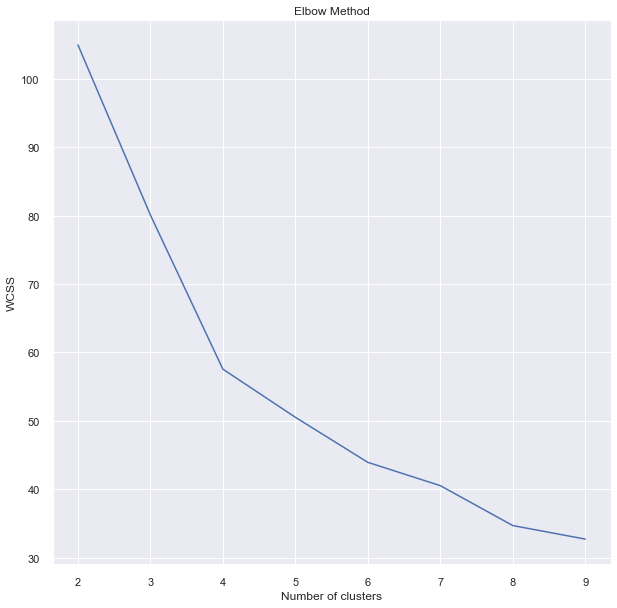

In [92]:
# to find the number of cluster, K-means  algortithm aims to choose the centroid that minimise the inertia,
# or within-cluster sum-of-squares criterion:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

model1


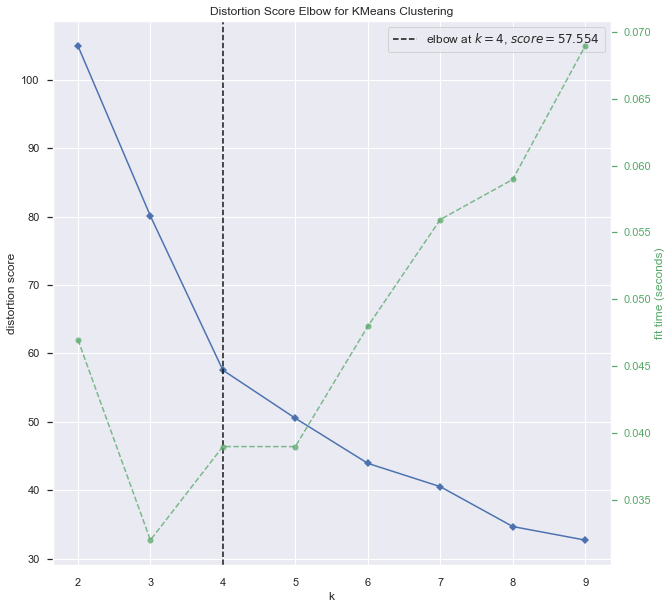

model2


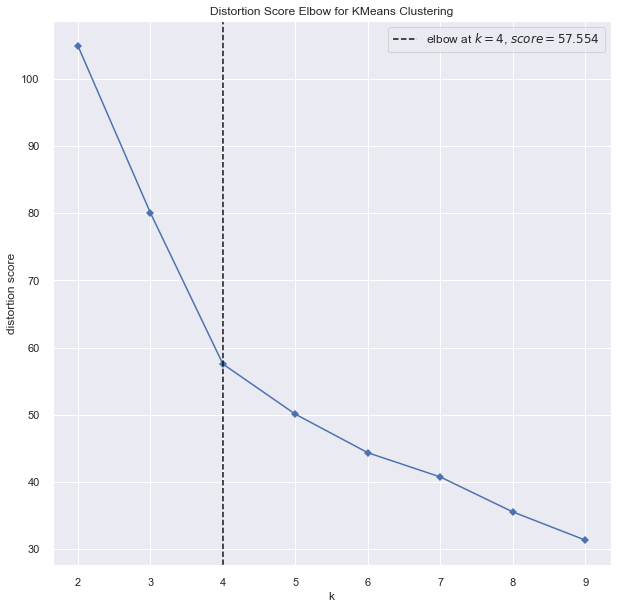

In [94]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='distortion', timings=True)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='distortion', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(scaled_crime_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(scaled_crime_df)    
visualizer2.poof()
plt.show()


In [95]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(scaled_crime_df)
    sil_score1= silhouette_score(scaled_crime_df, cluster_labels1)

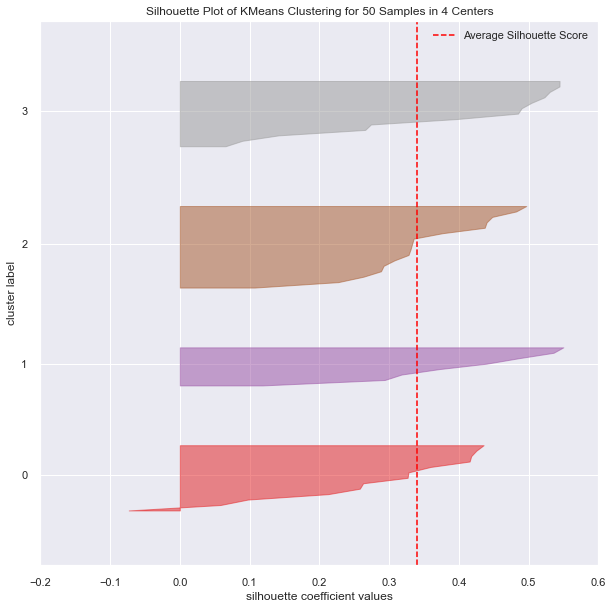

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [96]:
# Instantiate the clustering model and visualizer 

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model3 = KMeans(4)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_crime_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [97]:
 print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


In [98]:
# Assigning new cluster to the data set
crime_KM = crime.copy()
crime_KM['clust_KM'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [99]:
crime_KM.groupby('clust_KM').agg(['mean']).reset_index()

,clust_KM,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [100]:
crime_KM.head()

,US_State,Murder,Assault,UrbanPop,Rape,clust_KM
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [101]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_crime_df)
pca_2d = pca.transform(scaled_crime_df)

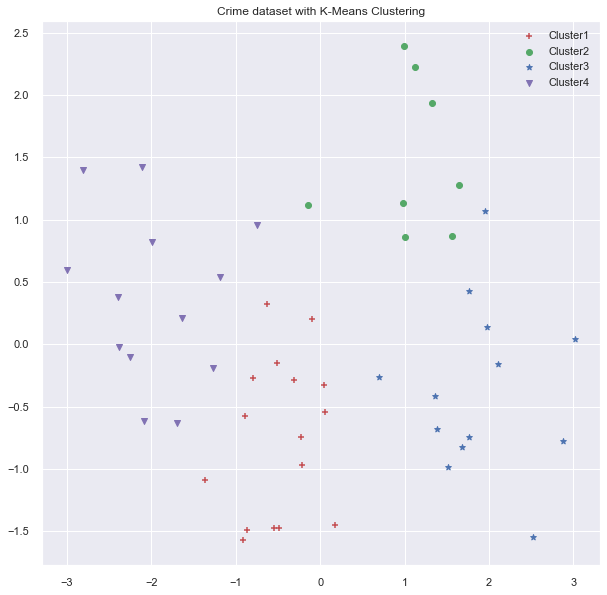

In [102]:
import pylab as pl
sns.set(rc={'figure.figsize':(10,10)})
for i in range(0, pca_2d.shape[0]):
    if crime_KM.clust_KM[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif crime_KM.clust_KM[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif crime_KM.clust_KM[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif crime_KM.clust_KM[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with K-Means Clustering')
pl.show()

## DBSCAN Clustering

In [103]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=4)

In [104]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [105]:
data_dbscan = crime.copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()

 1    28
-1    18
 0     4
Name: clusters_dbscan, dtype: int64

#### Model Evaluation and Visualisation

In [106]:
data_dbscan.groupby('clusters_dbscan').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_dbscan,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [107]:
#Visualising the data via dimensionality reduction

pca_db = PCA(n_components=2).fit(scaled_crime_df)
pca_2d_db = pca_db.transform(scaled_crime_df)

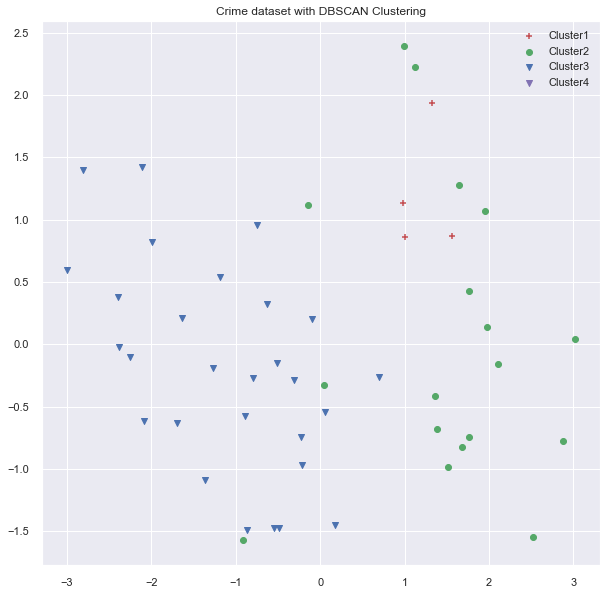

In [108]:
for i in range(0, pca_2d_db.shape[0]):
    if data_dbscan.clusters_dbscan[i] == 0:
        c1 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='r', marker='+')
    elif data_dbscan.clusters_dbscan[i] == -1:
        c2 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='g', marker='o')
    elif data_dbscan.clusters_dbscan[i] == 1:
        c3 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='b', marker='v')
    elif crime_KM.clust_KM[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d_db[i,1],c='m', marker='*')
        
        
pl.legend([c1, c2, c3,c4], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])
pl.title('Crime dataset with DBSCAN Clustering')
pl.show()
#The number of entries is very poor for good clustering. dencisty of points is high too.

## Heirarchial Agglomerative Clustering

###### Dendogram

In [109]:
import scipy.cluster.hierarchy as sch

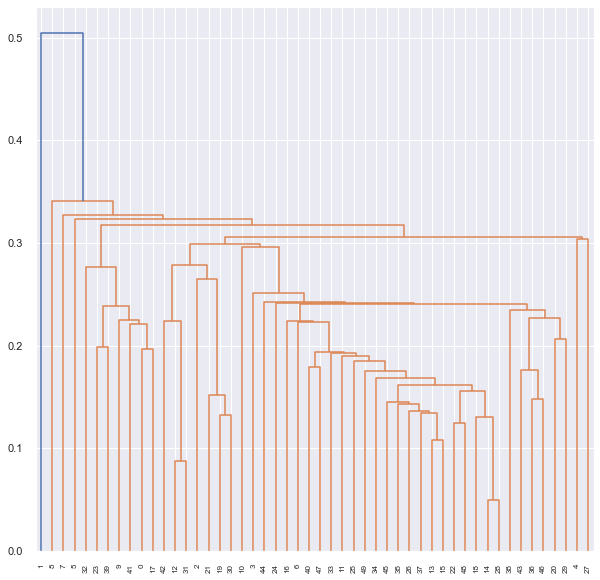

In [110]:

dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [111]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(crime_norm)

In [112]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [113]:
data_agglo = crime.copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

1    20
3    12
2    10
0     8
Name: clusters_agglo, dtype: int64

#### Model Evaluation & Visualisation

In [114]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_agglo,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [115]:
#Visualising the data via dimensionality reduction

pca_agg = PCA(n_components=2).fit(crime_norm)
pca_2d_agg = pca_agg.transform(crime_norm)

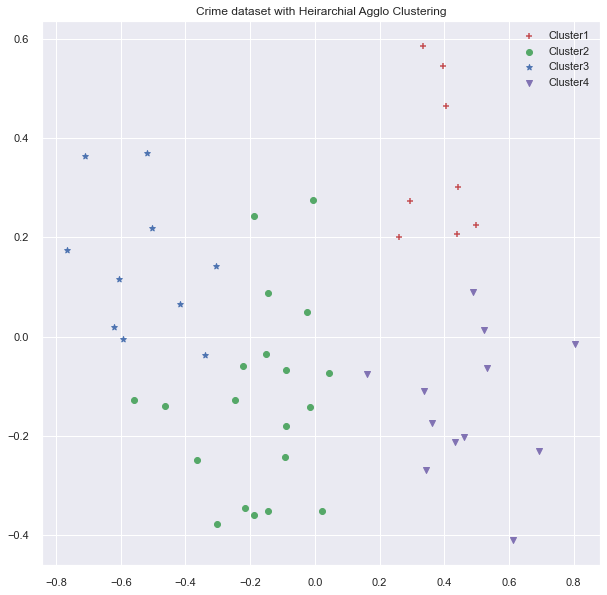

In [116]:
for i in range(0, pca_2d_agg.shape[0]):
    if data_agglo.clusters_agglo[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif data_agglo.clusters_agglo[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif data_agglo.clusters_agglo[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')
    elif data_agglo.clusters_agglo[i] == 3:
        c4 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with Heirarchial Agglo Clustering')
pl.show()

## Observations

I  Applied all(Hierarchical,KMeans,DBscan) Clustering Algorithm in above dataset of Crime dataset from that  I got four clusters.

The outputs obtained by both k-means clustering and dbscan clustering are similar with slight variations.
